In [1]:
# Setup

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import root as sp_root

from utils.solvers import FirstOrderDiffEqn
from utils.solvers.firstorder import num_sol_runge_kutta,num_sol_euler
from utils.plot.utils import draw_circle, draw_arrow

plt.rcParams["figure.figsize"] = (20, 5)

def saveFig(filename, chapter):
  plt.savefig(f"plots/chapter{chapter}/{filename}.png", facecolor="w")

# Chapter 4 - Flows on the Circle

- Dealing with **vector fields on the circle** defined by
$$
\begin{equation}
\dot{\theta} = f(\theta)
\end{equation}
$$
- Still one-dimensional
  - But by flowing in one direction, point can end up back at the starting point
  - Therefore, allows for periodic solutions
- A vector field must have a uniquely defined vector for each point
  - A vector field on a circle requires $f(\theta) = f(\theta + 2 \pi)$

## Non-uniform oscillator
The non-uniform oscillator is defined by
$$
\begin{equation}
\dot{\theta} = \omega - a \sin\theta
\end{equation}
$$
- There is a saddle-node bifurcation at $a = \omega$

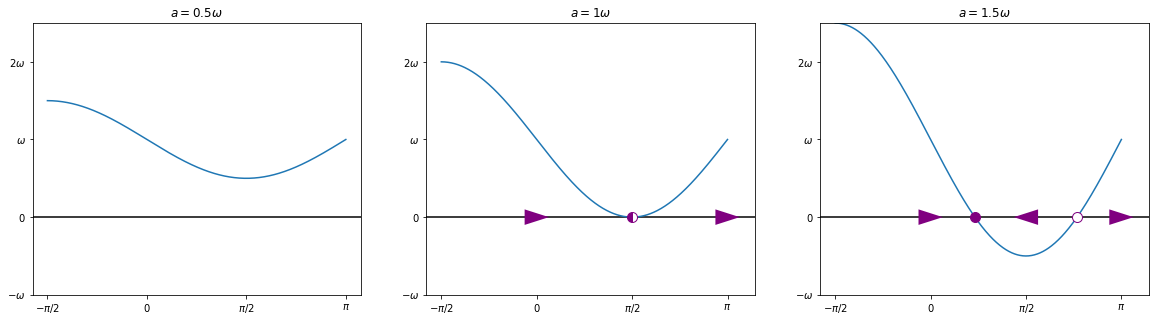

In [35]:
theta = np.linspace(-np.pi/2, np.pi, 600)
omega = 1
theta_dot_a = lambda a: omega - a * np.sin(theta)

for idx, a in enumerate([omega/2, omega, 3*omega/2], start=1):
  plt.subplot(1, 3, idx)
  plt.plot(theta, theta_dot_a(a))
  plt.ylim(-omega, 5*omega/2)
  plt.xticks([-np.pi/2, 0, np.pi/2, np.pi], ["$-\pi/2$", "$0$", "$\pi/2$", "$\pi$"])
  plt.yticks([-omega, 0, omega, 2*omega], ["$-\omega$", "$0$", "$\omega$", "$2\omega$"])
  plt.axhline(color="black", zorder=-100)
  plt.title(f"$a = {a} \omega$")

plt.subplot(132)
draw_circle([np.pi/2, 0], 10.0, type="left")
draw_arrow([0, 0], "right", head_width=0.2, head_length=0.4)
draw_arrow([np.pi, 0], "right", head_width=0.2, head_length=0.4)
plt.subplot(133)
draw_circle([np.arcsin(2/3), 0], 10.0)
draw_circle([np.pi - np.arcsin(2/3), 0], 10.0, type="empty")
draw_arrow([0, 0], "right", head_width=0.2, head_length=0.4)
draw_arrow([np.pi/2, 0], "left", head_width=0.2, head_length=0.4)
draw_arrow([np.pi, 0], "right", head_width=0.2, head_length=0.4)

saveFig("nonuniform_oscillator", 4)

- When $a < \omega$, oscillation period is $T = \int_0^{2\pi} \frac{\mathrm{d} t}{\mathrm{d} \theta} \mathrm{d}\theta$ = $\int_0^{2\pi} \frac{\mathrm{d} \theta}{\omega - a\sin\theta} = \frac{2\pi}{\sqrt{\omega^2 - a^2}}$